In [1]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("C:/Users/31902/data/MNIST",one_hot=False)
print('完成数据集的加载')

C:\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/Users/31902/data/MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/Users/31902/data/MNIST\train-labels-idx1-ubyte.gz
Extracting C:/Users/31902/data/MNIST\t10k-images-idx3-ubyte.gz
Extracting C:/Users/31902/data/MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
完成数据集的加载


In [2]:
import numpy as np
X0 = data.train.images
Y0 = data.train.labels
print(np.max(X0),np.min(X0))
print(Y0[0:10])
X1 = data.validation.images
Y1 = data.validation.labels
print('X0的形状=',X0.shape,end="")
print('  Y0的形状=',Y0.shape,end="")
print('  X1的形状=',X1.shape,end="")
print('  Y1的形状=',Y1.shape,end="")
print('得到训练集和测试集')

1.0 0.0
[7 3 4 6 1 8 1 0 9 8]
X0的形状= (55000, 784)  Y0的形状= (55000,)  X1的形状= (5000, 784)  Y1的形状= (5000,)得到训练集和测试集


In [3]:
print(Y0[0:5])
from keras.utils import to_categorical
YY0=to_categorical(Y0)
YY1=to_categorical(Y1)
print(YY0[0:5,:])

[7 3 4 6 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Using TensorFlow backend.


In [4]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax = plt.subplots(2,5)
ax=ax.flatten()
print(ax.shape)
for i in range(10):
    Im=X0[i,:]
    print(Im.shape)
    Im=Im.reshape(28,28)
    print(Im.shape)
    ax[i].imshow(Im,cmap='gray')

(10,)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)
(784,)
(28, 28)


X0的形状= (55000, 28, 28, 1)  X1的形状= (5000, 28, 28, 1)


<Figure size 432x288 with 0 Axes>

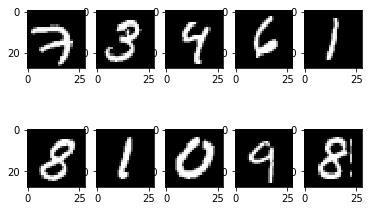

In [5]:
from matplotlib import pyplot as plt
N0=X0.shape[0];N1=X1.shape[0]
X0=X0.reshape(N0,28,28,1)
X1=X1.reshape(N1,28,28,1)
print('X0的形状=',X0.shape,end="")
print('  X1的形状=',X1.shape)
plt.figure()
fig,ax = plt.subplots(2,5)
ax=ax.flatten()
for i in range(10):
    Im=X0[i,:]
    Im=Im.reshape(28,28)
    ax[i].imshow(Im,cmap='gray')

In [6]:
from keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D
from keras import Model
input_layer = Input([28,28,1])
x = input_layer
x = Conv2D(1,[5,5],padding = "same",activation = 'relu')(x)
x = MaxPooling2D(pool_size = [2,2],strides = [2,2])(x)
x = Flatten()(x)
x = Dense(10,activation = 'softmax')(x)
output_layer=x
model3=Model(input_layer,output_layer)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 1)         26        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 196)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1970      
Total params: 1,996
Trainable params: 1,996
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
model3.compile(optimizer = Adam(0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
history=model3.fit(X0,YY0,validation_data=(X1,YY1),batch_size=200,epochs=10)
print("完成CNN模型的训练和预测")

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 132us/step - loss: 0.4985 - acc: 0.8527 - val_loss: 0.3007 - val_acc: 0.9096
Epoch 2/10
55000/55000 [==============================] - 7s 129us/step - loss: 0.3034 - acc: 0.9105 - val_loss: 0.2798 - val_acc: 0.9180
Epoch 3/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.2824 - acc: 0.9172 - val_loss: 0.2579 - val_acc: 0.9256
Epoch 4/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.2707 - acc: 0.9211 - val_loss: 0.2661 - val_acc: 0.9232
Epoch 5/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.2637 - acc: 0.9227 - val_loss: 0.2546 - val_acc: 0.9300
Epoch 6/10
55000/55000 [==============================] - 7s 129us/step - loss: 0.2624 - acc: 0.9225 - val_loss: 0.2592 - val_acc: 0.9270
Epoch 7/10
55000/55000 [==============================] - 7s 129us/step - loss: 0.2571 - acc: 0.9252 - val_loss: 0.2593 - v

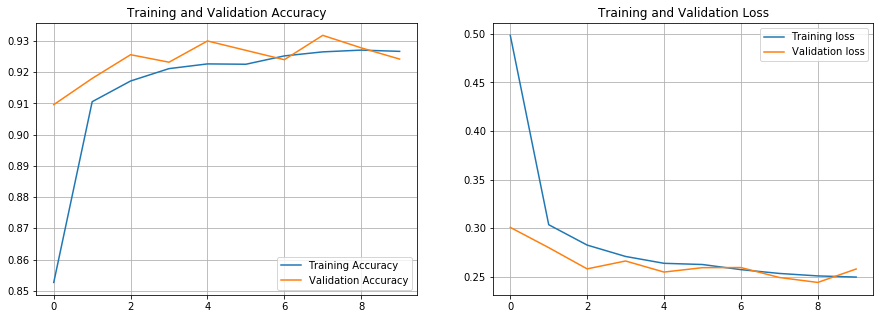

In [9]:
def plot_acc_loss_curve(history):
    from matplotlib import pyplot as plt
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc,label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss,label='Training loss')
    plt.plot(val_loss,label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid()
    plt.show()
plot_acc_loss_curve(history)

In [10]:
print(model3.layers)

[<keras.engine.input_layer.InputLayer object at 0x0000020BD1FE2F28>, <keras.layers.convolutional.Conv2D object at 0x0000020BD2030278>, <keras.layers.pooling.MaxPooling2D object at 0x0000020BD1FE28D0>, <keras.layers.core.Flatten object at 0x0000020BD2030080>, <keras.layers.core.Dense object at 0x0000020BD2257A90>]


In [11]:
print(model3.layers[1].get_weights()[0].shape)
model3.layers[1].get_weights()

(5, 5, 1, 1)


[array([[[[ 0.04961988]],
 
         [[ 0.39250547]],
 
         [[-0.04936446]],
 
         [[-0.21566582]],
 
         [[-0.2295121 ]]],
 
 
        [[[ 0.4341537 ]],
 
         [[ 0.09431356]],
 
         [[ 0.21817543]],
 
         [[ 0.10679254]],
 
         [[-0.07178333]]],
 
 
        [[[-0.6223956 ]],
 
         [[-0.14824599]],
 
         [[-0.00676803]],
 
         [[ 0.265285  ]],
 
         [[ 0.12942061]]],
 
 
        [[[-0.84999096]],
 
         [[-0.36403748]],
 
         [[-0.08352936]],
 
         [[ 0.30185875]],
 
         [[ 0.54975927]]],
 
 
        [[[ 0.7793199 ]],
 
         [[ 0.09426371]],
 
         [[-0.3659209 ]],
 
         [[ 0.39393103]],
 
         [[ 0.7163295 ]]]], dtype=float32), array([0.08888809], dtype=float32)]

In [12]:
print(model3.layers[4].get_weights()[0].shape)
print(model3.layers[4].get_weights()[1].shape)
model3.layers[4].get_weights()

(196, 10)
(10,)


[array([[ 0.22737317,  1.240219  , -0.21877186, ...,  0.70008713,
         -1.2996451 ,  0.08153631],
        [-0.26450828,  1.0773145 , -0.39924237, ...,  0.8046904 ,
         -1.2554512 , -0.14799292],
        [-0.3935284 ,  0.8653676 , -0.0888494 , ...,  0.61852133,
         -1.2455901 , -0.03061462],
        ...,
        [-0.6722397 ,  0.39425123, -1.138307  , ...,  0.7302276 ,
         -0.63328874,  1.3691518 ],
        [-0.20470592,  0.5165156 , -1.003815  , ...,  0.36398122,
         -1.0147971 ,  0.64172614],
        [-0.04852824,  1.055216  , -0.31149593, ...,  0.5489374 ,
         -1.1936241 , -0.13499282]], dtype=float32),
 array([-4.9392506e-04,  1.2397183e+00, -2.5395787e-01, -5.7006896e-01,
         4.8487341e-01,  8.7289608e-01, -2.6431513e-01,  1.0527103e+00,
        -1.7548692e+00, -1.6451940e-01], dtype=float32)]